In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from datetime import datetime 
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import pandas as pd
from torch.utils.data import SubsetRandomSampler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
from sklearn.pipeline import make_pipeline

### B1

In [2]:
torch.manual_seed(1748456)

#### B2.1 a)

In [3]:
batchSize = 8

#Load the training data
trainset = datasets.FashionMNIST(root='./data/', train=True,
                                        download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchSize,
                                          shuffle=False, num_workers=2)
#Load the test data
testset = datasets.FashionMNIST(root='./data/', train=False,
                                       download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batchSize, 
                                         shuffle=False, num_workers=2)

In [4]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
print('Training set size:', len(trainset))
print('Test set size:',len(testset))

Training set size: 60000
Test set size: 10000


#### B2.1 b)

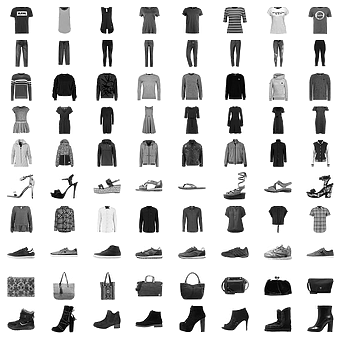

In [5]:
count = 0
plt.figure(figsize = (6,6))
subplot_index = 0
for i in range(10): # the class index is i
    # print('The current class is %s.'%classes[i])
    class_images = torch.randn(8,1,28,28)
    for image, label in trainloader:
        for j in range(batchSize): 
            # find the right class in the current batch
            if label[j] == i:
                count += 1
                if count == 9:
                    break
                class_images[count-1]=image[j]                
        if count >= 8:
            # show images
            plt.axis('off')
            for n in range(8):
                plt.subplot(10,8,subplot_index+1)
                plt.axis('off')
                plt.imshow(class_images[n].squeeze(),cmap=plt.cm.binary)
                subplot_index += 1
            # print labels
            count = 0
            break           

### B 2.2

In [6]:
class LR_model_accuracy():
    def __init__(self,dataloader):
        super(LR_model_accuracy, self).__init__()
        self.correct = 0
        self.total = 0
        self.pred=[]
        self.y_test=[]
        with torch.no_grad():
            for i,data in enumerate(dataloader):
                images, labels = data
                self.y_test.extend(labels)
                outputs = LR(images)
                _, predicted = torch.max(outputs.data, 1)# row max
                self.total += labels.size(0)
                self.correct += (predicted == labels).sum().item()
                self.pred.extend(predicted)
        print('Accuracy of the Logistic Regression Model: %d %%' % (100 * self.correct / self.total))
        
    def confusion_matrix(self): 
        plt.figure(figsize=(8,6))
        mat=confusion_matrix(self.y_test,self.pred)
        mat = pd.DataFrame(data=mat,columns=classes,index=classes)
        sns.heatmap(mat.T, square=True, annot=True, 
                    fmt='d', linewidths=.5,cmap="YlGnBu",
                    cbar_kws={"fraction":0.046, "pad":0.03})
        plt.xlabel('true label')
        plt.ylabel('predicted label')
        plt.title('confusion matrix of Fashion-MNIST')
        plt.show()

#### B2.3 a)

In [7]:
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.l1 = torch.nn.Linear(784, 10) 
        #self.l2 = torch.nn.Linear(128, 10)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        x = x.view(-1, 784)
        x = self.sigmoid(self.l1(x))
        #x = self.sigmoid(self.l2(x))
        return x

LR = LogisticRegressionModel()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(LR.parameters(),lr = 0.01,momentum=0.9)

In [9]:
start_time = datetime.now()
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        X_data,y_data = data
        optimizer.zero_grad() 
        
        y_pred = LR(X_data)
        loss = criterion(y_pred,y_data)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
end_time = datetime.now()
cost_time=(end_time-start_time).seconds

[1,  2000] loss: 1.737440
[1,  4000] loss: 1.664461
[1,  6000] loss: 1.645031
[2,  2000] loss: 1.628410
[2,  4000] loss: 1.623476
[2,  6000] loss: 1.618372


#### M1

In [10]:
M1_data = []

In [11]:
Training_accuracy = LR_model_accuracy(trainloader)

Accuracy of the Logistic Regression Model: 78 %


In [12]:
M1_data.append(Training_accuracy.correct/Training_accuracy.total)

#### M2

In [13]:
M2_data = []

In [14]:
testing_accuracy  = LR_model_accuracy(testloader)

Accuracy of the Logistic Regression Model: 77 %


In [15]:
M2_data.append(testing_accuracy.correct/testing_accuracy.total)

#### M3

In [16]:
M3_data = []

In [17]:
print('Training time: %fs'%cost_time )

Training time: 8.000000s


In [18]:
M3_data.append(cost_time)

#### M4

In [19]:
M4_data = []

In [20]:
LR_params = list(LR.parameters())
print("len(LR_params):", len(LR_params))
print("Weights:", LR_params[0].shape)  # weight matrix size
print("Biases:", LR_params[1].shape)

len(LR_params): 2
Weights: torch.Size([10, 784])
Biases: torch.Size([10])


In [21]:
par_num = sum(param.numel() for param in LR.parameters())
print(par_num)

7850


The number of parameter is： 784*10 +10 = 7850

In [22]:
M4_data.append(par_num)

#### confusion matrix

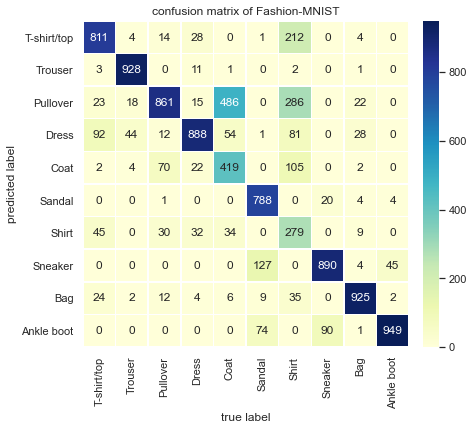

In [23]:
testing_accuracy.confusion_matrix()

#### B2.3 b)

In [24]:
start_time = datetime.now()
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        X_data,y_data = data
        optimizer.zero_grad() 
        
        y_pred = LR(X_data)
        loss = criterion(y_pred,y_data)
        
        # L1 regularisation
        regularization_loss = 0
        for parm in LR.parameters():
            regularization_loss += torch.sum(torch.abs(parm[0]))
       
        loss = loss + regularization_loss*0.001
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
end_time = datetime.now()
cost_time=(end_time-start_time).seconds

[1,  2000] loss: 1.665398
[1,  4000] loss: 1.642754
[1,  6000] loss: 1.639106
[2,  2000] loss: 1.635445
[2,  4000] loss: 1.633730
[2,  6000] loss: 1.632146


#### M1

In [25]:
Training_accuracy = LR_model_accuracy(trainloader)

Accuracy of the Logistic Regression Model: 80 %


In [26]:
M1_data.append(Training_accuracy.correct/Training_accuracy.total)

#### M2

In [27]:
testing_accuracy  = LR_model_accuracy(testloader)

Accuracy of the Logistic Regression Model: 79 %


In [28]:
M2_data.append(testing_accuracy.correct/testing_accuracy.total)

#### M3

In [29]:
print('Training time: %fs'%cost_time )

Training time: 11.000000s


In [30]:
M3_data.append(cost_time)

#### M4

In [31]:
LR_params = list(LR.parameters())
print("len(LR_params):", len(LR_params))
print("Weights:", LR_params[0].shape)  # weight matrix size
print("Biases:", LR_params[1].shape)

len(LR_params): 2
Weights: torch.Size([10, 784])
Biases: torch.Size([10])


In [32]:
par_num = sum(param.numel() for param in LR.parameters())
print(par_num)

7850


The number of parameter is： 784*10 +10 = 7850

In [33]:
M4_data.append(par_num)

#### confusion matrix

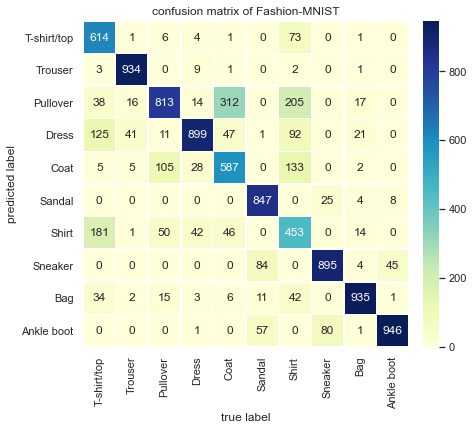

In [34]:
testing_accuracy.confusion_matrix()

#### B2.3 c)

In [35]:
criterion = nn.CrossEntropyLoss()

# L2 regularisation: weight_decay = 0.001
optimizer = torch.optim.SGD(LR.parameters(),lr = 0.01,momentum=0.9,weight_decay=0.001)

In [36]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        X_data,y_data = data
        # X_data, y_data = X_data.to(device), y_data.to(device) 
        optimizer.zero_grad() 
        
        y_pred = LR(X_data)
        loss = criterion(y_pred,y_data)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,  2000] loss: 1.610632
[1,  4000] loss: 1.614366
[1,  6000] loss: 1.620666
[2,  2000] loss: 1.629541
[2,  4000] loss: 1.633381
[2,  6000] loss: 1.635039


#### M1

In [37]:
Training_accuracy = LR_model_accuracy(trainloader)

Accuracy of the Logistic Regression Model: 78 %


In [38]:
M1_data.append(Training_accuracy.correct/Training_accuracy.total)

#### M2

In [39]:
testing_accuracy  = LR_model_accuracy(testloader)

Accuracy of the Logistic Regression Model: 77 %


In [40]:
M2_data.append(testing_accuracy.correct/testing_accuracy.total)

#### M3

In [41]:
print('Training time: %fs'%cost_time )

Training time: 11.000000s


In [42]:
M3_data.append(cost_time)

#### M4

In [43]:
LR_params = list(LR.parameters())
print("len(LR_params):", len(LR_params))
print("Weights:", LR_params[0].shape)  # weight matrix size
print("Biases:", LR_params[1].shape)

len(LR_params): 2
Weights: torch.Size([10, 784])
Biases: torch.Size([10])


In [44]:
par_num = sum(param.numel() for param in LR.parameters())
print(par_num)

7850


The number of parameter is： 784*10 +10 = 7850

In [45]:
M4_data.append(par_num)

#### confusion matrix

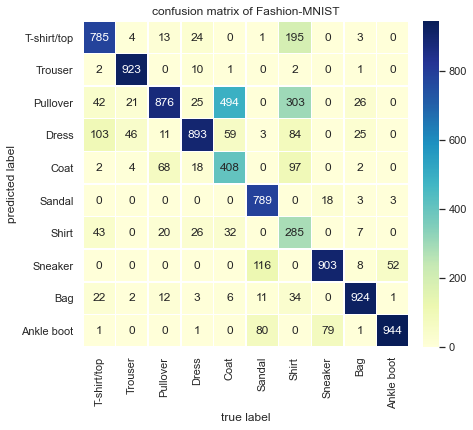

In [46]:
testing_accuracy.confusion_matrix()

### B2.4 Convolutional Neural networks 

In [47]:
class CNN_model_accuracy():
    def __init__(self,dataloader):
        super(CNN_model_accuracy, self).__init__()
        self.correct = 0
        self.total = 0
        self.pred=[]
        self.y_test=[]
        with torch.no_grad():
            for i,data in enumerate(dataloader):
                images, labels = data
                self.y_test.extend(labels)
                outputs = myCNN(images)
                _, predicted = torch.max(outputs.data, 1)
                self.total += labels.size(0)
                self.correct += (predicted == labels).sum().item()
                self.pred.extend(predicted)
        print('Accuracy of the CNN Model: %d %%' % (100 * self.correct / self.total))
        
    def confusion_matrix(self): 
        plt.figure(figsize=(8,6))
        mat=confusion_matrix(self.y_test,self.pred)
        mat = pd.DataFrame(data=mat,columns=classes,index=classes)
        sns.heatmap(mat.T, square=True, annot=True, 
                    fmt='d', linewidths=.5,cmap="YlGnBu",
                    cbar_kws={"fraction":0.046, "pad":0.03})
        plt.xlabel('true label')
        plt.ylabel('predicted label')
        plt.title('confusion matrix of Fashion-MNIST')
        plt.show()

#### B2.4 a) two Conv layers and two FC layers

In [48]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) #1: #input channels; 6: #output channels; 5: kernel size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 70)
        self.fc2 = nn.Linear(70, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

myCNN = CNN()

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myCNN.parameters(), lr=0.001, momentum=0.9)

In [50]:
max_epochs=2
start_time = datetime.now()
for epoch in range(max_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = myCNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
end_time = datetime.now()
cost_time=(end_time-start_time).seconds
print('Finished Training!')

[1,  2000] loss: 1.190
[1,  4000] loss: 0.657
[1,  6000] loss: 0.561
[2,  2000] loss: 0.486
[2,  4000] loss: 0.459
[2,  6000] loss: 0.435
Finished Training!


#### M1

In [51]:
Training_accuracy = CNN_model_accuracy(trainloader)

Accuracy of the CNN Model: 85 %


In [52]:
M1_data.append(Training_accuracy.correct/Training_accuracy.total)

#### M2

In [53]:
testing_accuracy  = CNN_model_accuracy(testloader)

Accuracy of the CNN Model: 84 %


In [54]:
M2_data.append(testing_accuracy.correct/testing_accuracy.total)

#### M3

In [55]:
print('Training time: %fs'%cost_time )

Training time: 40.000000s


In [56]:
M3_data.append(cost_time)

#### M4

In [57]:
myCNN_params = list(myCNN.parameters())
print("len(myCNN_params):", len(myCNN_params))
for i in myCNN_params:
    print(i.size())

len(myCNN_params): 8
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([70, 256])
torch.Size([70])
torch.Size([10, 70])
torch.Size([10])


In [58]:
par_num = sum(param.numel() for param in myCNN.parameters())
print(par_num)

21272


The number of parameter is： 5*5*6+6+5*5*6*16+16+ 16*256+16 + 258*70 +10 = 22839

In [59]:
M4_data.append(par_num)

#### confusion matrix

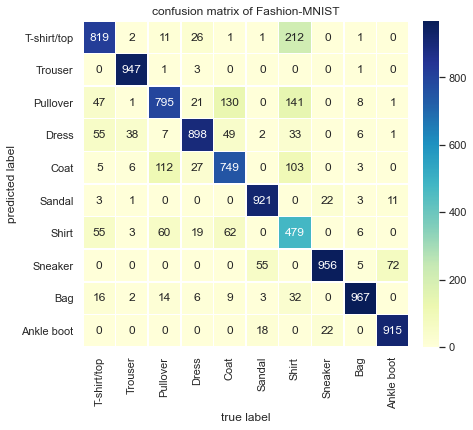

In [60]:
testing_accuracy.confusion_matrix()

#### B2.4 b) two Conv layers and five FC layers

In [61]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) #1: #input channels; 6: #output channels; 5: kernel size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 200)
        self.fc2 = nn.Linear(200, 150)
        self.fc3 = nn.Linear(150, 100)
        self.fc4 = nn.Linear(100, 50)
        self.fc5 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

myCNN = CNN()

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myCNN.parameters(), lr=0.001, momentum=0.9)

In [63]:
max_epochs=2
start_time = datetime.now()

for epoch in range(max_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = myCNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

end_time = datetime.now()
cost_time=(end_time-start_time).seconds
print('Finished Training!')

[1,  2000] loss: 2.301
[1,  4000] loss: 1.677
[1,  6000] loss: 0.884
[2,  2000] loss: 0.630
[2,  4000] loss: 0.581
[2,  6000] loss: 0.536
Finished Training!


#### M1

In [64]:
Training_accuracy = CNN_model_accuracy(trainloader)

Accuracy of the CNN Model: 81 %


In [65]:
M1_data.append(Training_accuracy.correct/Training_accuracy.total)

#### M2

In [66]:
testing_accuracy  = CNN_model_accuracy(testloader)

Accuracy of the CNN Model: 80 %


In [67]:
M2_data.append(testing_accuracy.correct/testing_accuracy.total)

#### M3

In [68]:
print('Training time: %fs'%cost_time )

Training time: 56.000000s


In [69]:
M3_data.append(cost_time)

#### M4

In [70]:
myCNN_params = list(myCNN.parameters())
print("len(myCNN_params):", len(myCNN_params))
for i in myCNN_params:
    print(i.size())

len(myCNN_params): 14
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([200, 256])
torch.Size([200])
torch.Size([150, 200])
torch.Size([150])
torch.Size([100, 150])
torch.Size([100])
torch.Size([50, 100])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [71]:
par_num = sum(param.numel() for param in myCNN.parameters())
print(par_num)

104782


In [72]:
M4_data.append(par_num)

#### confusion matrix

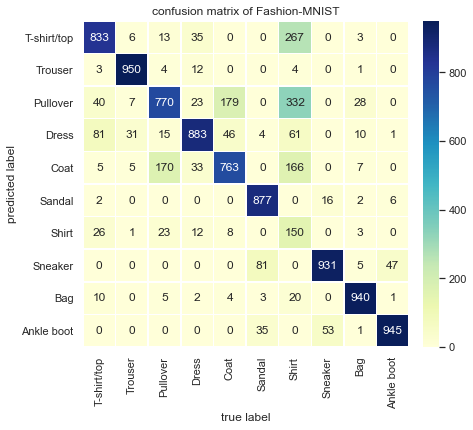

In [73]:
testing_accuracy.confusion_matrix()

#### B2.4 c) five Conv layers and two FC layers

In [74]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 2,padding=1) #3: #input channels; 6: #output channels; 5: kernel size
        self.conv2 = nn.Conv2d(6, 16, 2,padding=1)
        self.conv3 = nn.Conv2d(16, 26, 2,padding=1)
        self.conv4 = nn.Conv2d(26, 20, 2,padding=1)
        self.conv5 = nn.Conv2d(20, 16, 2,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
        
        self.fc1 = nn.Linear(16 * 1 * 1, 70)
        self.fc2 = nn.Linear(70, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 16 * 1 * 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

myCNN = CNN()

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myCNN.parameters(), lr=0.001, momentum=0.9)

In [76]:
max_epochs=2
start_time = datetime.now()

for epoch in range(max_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = myCNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
end_time = datetime.now()
cost_time=(end_time-start_time).seconds
print('Finished Training!')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.303
[1,  6000] loss: 2.302
[2,  2000] loss: 1.610
[2,  4000] loss: 0.925
[2,  6000] loss: 0.770
Finished Training!


#### M1

In [77]:
Training_accuracy = CNN_model_accuracy(trainloader)

Accuracy of the CNN Model: 73 %


In [78]:
M1_data.append(Training_accuracy.correct/Training_accuracy.total)

#### M2

In [79]:
testing_accuracy  = CNN_model_accuracy(testloader)

Accuracy of the CNN Model: 72 %


In [80]:
M2_data.append(testing_accuracy.correct/testing_accuracy.total)

#### M3

In [81]:
print('Training time: %fs'%cost_time )

Training time: 58.000000s


In [82]:
M3_data.append(cost_time)

#### M4

In [83]:
myCNN_params = list(myCNN.parameters())
print("len(myCNN_params):", len(myCNN_params))
for i in myCNN_params:
    print(i.size())

len(myCNN_params): 14
torch.Size([6, 1, 2, 2])
torch.Size([6])
torch.Size([16, 6, 2, 2])
torch.Size([16])
torch.Size([26, 16, 2, 2])
torch.Size([26])
torch.Size([20, 26, 2, 2])
torch.Size([20])
torch.Size([16, 20, 2, 2])
torch.Size([16])
torch.Size([70, 16])
torch.Size([70])
torch.Size([10, 70])
torch.Size([10])


In [84]:
par_num = sum(param.numel() for param in myCNN.parameters())
print(par_num)

7416


The number of parameter is： 
2*2*6+6+2*2*6*16+16+2*2*16*26+26+2*2*26*20+20+2*2*20*16+16+16*70+70+70*10+10 = 7416

In [85]:
M4_data.append(par_num)

#### confusion matrix

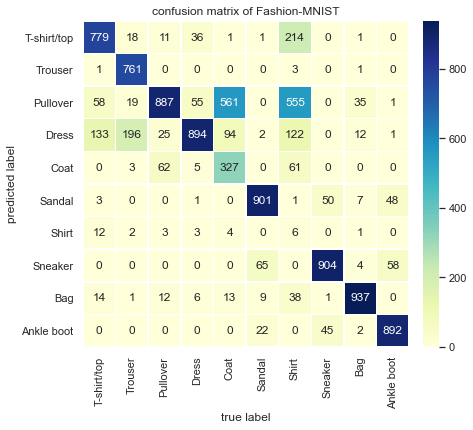

In [86]:
testing_accuracy.confusion_matrix()

### B2.4 Performance comparison

#### B 2.4 a）


In [87]:
x = np.arange(1,7)

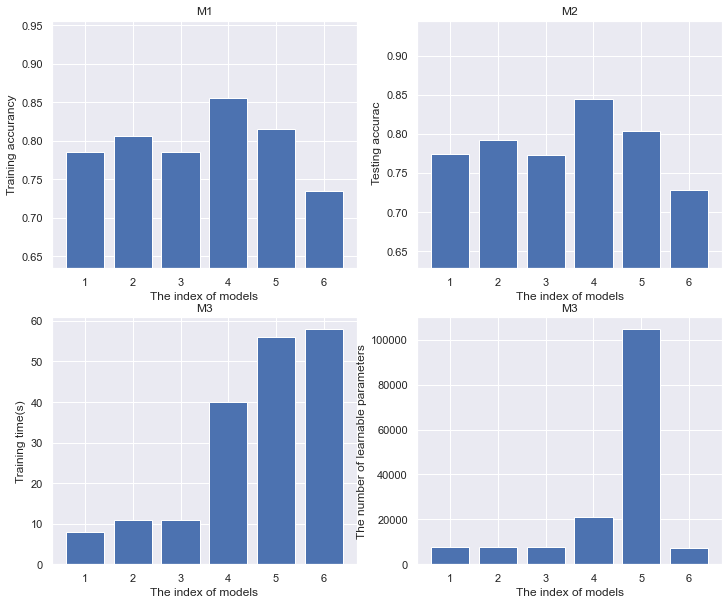

In [88]:
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
plt.bar(x,M1_data,color='b')
plt.title('M1')
plt.ylim([min(M1_data)-0.1,max(M1_data)+0.1])
plt.xlabel('The index of models')
plt.ylabel('Training accurancy')

plt.subplot(2,2,2)
plt.bar(x,M2_data,color='b')
plt.title('M2')
plt.ylim([min(M2_data)-0.1,max(M2_data)+0.1])
plt.xlabel('The index of models')
plt.ylabel(' Testing accurac')

plt.subplot(2,2,3)
plt.bar(x,M3_data,color='b')
plt.title('M3')
plt.xlabel('The index of models')
plt.ylabel('Training time(s)')

plt.subplot(2,2,4)
plt.bar(x,M4_data,color='b')
plt.title('M3')
plt.xlabel('The index of models')
plt.ylabel('The number of learnable parameters')
plt.show()

#### B 2.4 b）

1. The cnn models above are much time—consuming than logistic regression model

2. different hyperparameters cause different results and need different training time. Hence choose a good parameter set is vital.

3. more hiddenlayers does not lead a higher accurancy 

4. big kernel size and more hidden layers will bring more parameters


## B3. Unsupervised learning on Fashion-MNIST

### B3.1 PCA and k-means

#### B 3.1 a)

In [89]:
Sneaker = trainset.classes.index('Sneaker')
Bag = trainset.classes.index('Bag')

In [90]:
Sneaker_index = []
Bag_index = []
for i in range(len(trainset)):
    if trainset[i][1] == Sneaker:
        Sneaker_index.append(i)
    elif trainset[i][1] == Bag:
        Bag_index.append(i)

In [91]:
# gain the data of sneaker and Bag and save them in sneaker_Bag_data
sneaker_Bag_data = []
sneaker_Bag_label = []
for i in range(len(trainset)):
    if (trainset[i][1] == Sneaker)|(trainset[i][1] == Bag):
        sneaker_Bag_data.append(trainset[i][0])
        sneaker_Bag_label.append(trainset[i][1])

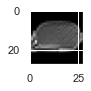

In [92]:
# check the data, you can run this cell for several times
plt.figure(figsize = (1,1))
inputs_im = sneaker_Bag_data[random.randint(0,100)].data.squeeze()
plt.imshow(inputs_im,cmap = plt.cm.gray)

In [93]:
sneaker_Bag_data[0].shape

torch.Size([1, 28, 28])

In [94]:
data = np.array(sneaker_Bag_data[0].numpy()).reshape(1, 28*28)
labels = np.array(sneaker_Bag_label)
for i in range(1, len(sneaker_Bag_data)):
    data = np.append(data,np.array(sneaker_Bag_data[i].numpy()).reshape(1, 28*28),axis = 0)

In [95]:
data_std = StandardScaler().fit_transform(data)

In [96]:
pca = PCA(n_components=24)
features_pca = pca.fit_transform(data_std)

In [97]:
print('Original number of features:',data_std.shape[1])
print('Reduced number of features:',features_pca.shape[1])

Original number of features: 784
Reduced number of features: 24


In [98]:
data_std.shape

(12000, 784)

In [99]:
features_pca.shape

(12000, 24)

In [100]:
print('The Top 24 eigenvectors:')
print(pca.components_)
print('The Top 24 eigenvalues:')
print(pca.explained_variance_)

The Top 24 eigenvectors:
[[ 0.0039295   0.00201787  0.00233546 ...  0.01301261  0.00921606
   0.00408952]
 [-0.00029888 -0.0015915  -0.00097377 ... -0.0171555  -0.01082551
  -0.00487045]
 [ 0.01032386  0.00681687  0.01109139 ... -0.01121888 -0.01142882
  -0.00563597]
 ...
 [-0.00181739  0.02873492  0.02986336 ... -0.08465531 -0.13441679
  -0.12140927]
 [ 0.01863469  0.07630008  0.07061867 ... -0.09601047 -0.04359079
  -0.00119509]
 [ 0.0023879   0.06073398  0.05401888 ...  0.02248661  0.03134723
   0.02417939]]
The Top 24 eigenvalues:
[196.54044   101.70556    51.773808   40.422318   24.885641   23.157461
  16.276268   12.291758   11.226012    9.424326    8.560718    8.222946
   6.849235    6.3672233   5.8099303   5.6864805   5.5314875   4.9751678
   4.470882    4.3304977   4.0008216   3.9219124   3.808635    3.6821918]


In [101]:
pca.components_.shape

(24, 784)

In [102]:
max_value = np.max(pca.components_,1)

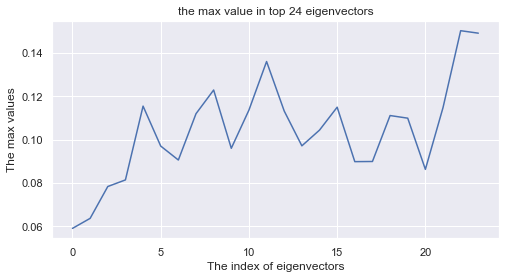

In [103]:
plt.figure(figsize=(8, 4))
plt.plot(max_value)
plt.title('the max value in top 24 eigenvectors')
plt.xlabel('The index of eigenvectors')
plt.ylabel('The max values')
plt.show()

### B 3.1 b)

In [104]:
# combine the first 15 indexes of sneaker and bag
Sneaker_Bag_index_15 = Sneaker_index[:15] + Bag_index[:15]

In [105]:
# create the first picture in the 'Sneaker_Bag_index_15'
# the first '0' means the index is 0
# the second '0' means the image in the data while '1' means the label
# convert the image into numpy and reshape it to a 1*784 vector
Sneaker_Bag_index_15_img = np.array(trainset[Sneaker_Bag_index_15[0]][0].numpy()).reshape(1, 28*28)

# traverse the index('Sneaker_Bag_index_15') from 1,since the index 0 is already exist
for index in Sneaker_Bag_index_15[1:]:
    Sneaker_Bag_index_15_img = np.append(Sneaker_Bag_index_15_img,
                                         np.array(trainset[index][0].numpy()).reshape(1, 28*28),
                                         axis = 0)

In [106]:
# apply TOP 24 pca(trained)
Sneaker_Bag_index_15_data_pca = pca.fit_transform(Sneaker_Bag_index_15_img)
reconstruct_images = pca.inverse_transform(Sneaker_Bag_index_15_data_pca)

#### mean squared error

In [107]:
MSE = mean_squared_error(reconstruct_images,Sneaker_Bag_index_15_img)
print("MSE=",MSE)

MSE= 0.001046909


In [108]:
reconstruct_images = torch.from_numpy(reconstruct_images)
reconstruct_images = reconstruct_images.reshape(30,1,28,28)

In [109]:
def printImage(images):
    plt.figure(figsize=(5, 5))
    for i in range(30):
        plt.subplot(6,5,i+1)
        plt.axis('off')
        plt.imshow(images[i].squeeze(), cmap=plt.cm.binary) 

####  reconstructed and original images

The original pictures:


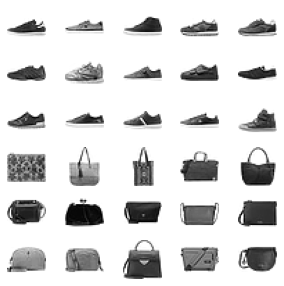

In [110]:
print('The original pictures:')
printImage(Sneaker_Bag_index_15_img.reshape(30,1,28,28))

The reconstructed pictures:


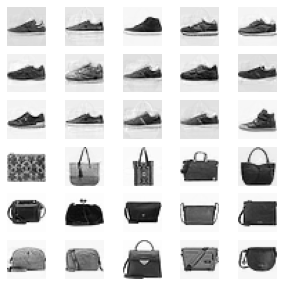

In [111]:
print('The reconstructed pictures:')
printImage(reconstruct_images)

### 3.1 c) 

In [112]:
# set the top 2 PCA and fit the data
sneaker_Bag_features = data_std
X_dr = PCA(2).fit_transform(sneaker_Bag_features)

In [113]:
# labels from list to array
sneaker_Bag_label = np.array(sneaker_Bag_label)

Text(0, 0.5, 'Second Principal Component')

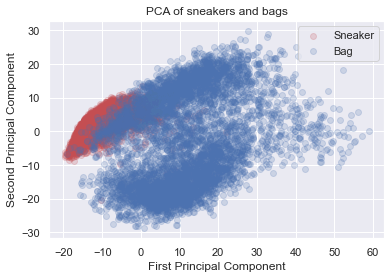

In [114]:
plt.figure()
# X_dr[sneaker_Bag_label==Sneaker,0] 
# get the index of sneaker in data
# 0 means the First Principal Component
# 1 means the Second Principal Component
plt.scatter(X_dr[sneaker_Bag_label==Sneaker,0],X_dr[sneaker_Bag_label==Sneaker,1],c = 'r',label = classes[Sneaker],alpha=0.2)
plt.scatter(X_dr[sneaker_Bag_label==Bag,0],X_dr[sneaker_Bag_label==Bag,1],c = 'b',label = classes[Bag],alpha=0.2)
plt.legend()
plt.title('PCA of sneakers and bags')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### B 3.1 d)

In [115]:
reduced_data = PCA(n_components=2).fit_transform(sneaker_Bag_features)
kmeans = KMeans(n_clusters=2)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

In [116]:
xs = reduced_data[:,0]
ys = reduced_data[:,1]

centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

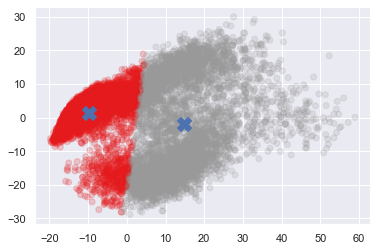

In [117]:
plt.scatter(xs, ys, c= labels,cmap='Set1',alpha = 0.2)
plt.scatter(centroids_x, centroids_y, marker='X', s=200)
plt.show()

### B 3.2 a)

In [118]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(1, 2, 3,  padding=1), 
            nn.ReLU(),
            nn.Conv2d(2, 4, 3,  padding=1),
            nn.ReLU(),
            nn.Conv2d(4, 16, 3,  padding=1), 
            nn.ReLU(),
            nn.Conv2d(16, 32, 3,  padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 4, 3,  padding=1),
            nn.ReLU(), 
            nn.ConvTranspose2d(4, 2, 3,  padding=1),
            nn.ReLU(), 
            nn.ConvTranspose2d(2, 1, 3,  padding=1),
            nn.Sigmoid() 
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
myAE=Autoencoder()
print(myAE)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(4, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): ConvTranspose2d(2, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Sigmoid()
  )
)


In [119]:
#Training (optimisation) parameters
batch_size=8
learning_rate=1e-3
max_epochs = 3

#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)


#Specify how the data will be loaded in batches (with random shuffling)
train_loader = torch.utils.data.DataLoader(sneaker_Bag_data, batch_size=batch_size, shuffle=True)
# train_loader = torch.utils.data.DataLoader(sneaker_Bag_data[:512], batch_size=batch_size, shuffle=True)
#Storage
outputs = []

#Start training
for epoch in range(max_epochs):
    for img in train_loader:
        # img, label = data
        optimizer.zero_grad()
        recon = myAE(img)
        loss = criterion(recon, img) 
        loss.backward()
        optimizer.step()            
    #if (epoch % 2) == 0:
    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon),)

Epoch:1, Loss:0.1075
Epoch:2, Loss:0.0910
Epoch:3, Loss:0.0872


### B 3.2 b)

In [120]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            #  input image channel, output channel,  square convolution
            nn.Conv2d(1, 2, 3,  padding=1), 
            nn.ReLU(),
            nn.Conv2d(2, 4, 3,  padding=1), 
            nn.ReLU(),
            nn.Conv2d(4, 16, 3,  padding=1), 
            nn.ReLU(),
            nn.Conv2d(16, 32, 3,  padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 1, (28,27)), # dimension of 2
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1, 32, (28,27)),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 4, 3,  padding=1),
            nn.ReLU(), 
            nn.ConvTranspose2d(4, 2, 3,  padding=1),
            nn.ReLU(), 
            nn.ConvTranspose2d(2, 1, 3,  padding=1),
            nn.Sigmoid() 
        )

    def forward(self, x):
        enco = self.encoder(x)
        deco = self.decoder(enco)
        return enco,deco
    
myAE=Autoencoder()
print(myAE)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(32, 1, kernel_size=(28, 27), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(1, 32, kernel_size=(28, 27), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(4, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): ConvTranspose2d(2, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Sigmoid()
  )
)


In [121]:
#Training (optimisation) parameters
batch_size=8
learning_rate=1e-3
max_epochs = 3

#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)

#Specify how the data will be loaded in batches (with random shuffling)
train_loader = torch.utils.data.DataLoader(sneaker_Bag_data[:512], batch_size=batch_size, shuffle=True)
#Storage
outputs = []

#Start training
for epoch in range(max_epochs):
    for img in train_loader:
        # img, label = data
        optimizer.zero_grad()
        _,recon = myAE(img)
        loss = criterion(recon, img) 
        loss.backward()
        optimizer.step()            
    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon),)

Epoch:1, Loss:0.0733
Epoch:2, Loss:0.0642
Epoch:3, Loss:0.0613


In [122]:
sneaker_Bag_data_tensor = torch.Tensor(len(sneaker_Bag_data),28*28)
sneaker_Bag_label_tensor = torch.Tensor(sneaker_Bag_label)
for i in range(len(sneaker_Bag_data)):
    sneaker_Bag_data_tensor[i]=sneaker_Bag_data[i].reshape(784)

In [123]:
# get 500 samples
myAE.eval()
TEST_num = 500
test_encoder,_ = myAE(sneaker_Bag_data_tensor[0:TEST_num,:].reshape(-1,1,28,28))
print("test_encoder.shape:",test_encoder.shape)

test_encoder.shape: torch.Size([500, 1, 1, 2])


In [124]:
# the index of seneaker and bag in the first 500 samples
sneaker_i = (sneaker_Bag_label_tensor == 7)[0:500]
Bag_i = (sneaker_Bag_label_tensor == 8)[0:500]

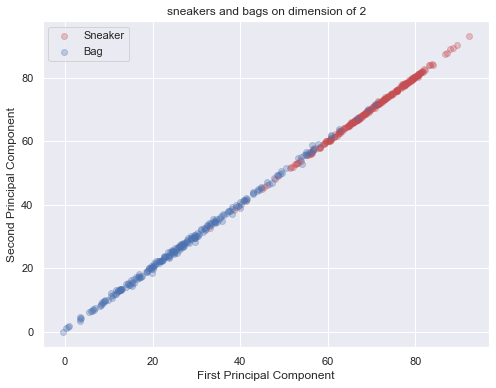

In [125]:
test_encoder_arr = test_encoder.reshape(500,2).data.numpy()
## 将前2个纬度的特征进行可视化
X = test_encoder_arr[:,0]
Y = test_encoder_arr[:,1]
plt.figure(figsize=(8,6))
plt.scatter(X[sneaker_i],Y[sneaker_i],c = 'r',label = classes[Sneaker],alpha=0.3)
plt.scatter(X[Bag_i],Y[Bag_i],c = 'b',label = classes[Bag],alpha=0.3)
plt.legend()
plt.title('sneakers and bags on dimension of 2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### B 3.3 

1. The quality of reconstructed-image will be reduced 

2. The several top pcs contains most information of the pictture

3. pca can reduce the cost time of model

4. reduce dimention to two makes visualization and classification easier

5. the results of k-means are related with the initial points

6. the bigger mean squared error in 3.2a) means the higher loss of quailty of pictures